In [1]:
import sys
sys.path.append('../..')

In [2]:
import sbi4abm.sbi
from sbi4abm.sbi import analysis, utils
from sbi4abm.utils import sampling, plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import pickle
import seaborn as sns

/home/pmms2/sbi4abm/py_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
matplotlib.rc('text', usetex=True)
plt.rcParams.update({
  "text.usetex": False,
  "font.family": "serif"
})
plt.rcParams.update({
    'text.latex.preamble':r"\usepackage{amsmath}"+"\n"+r"\usepackage{bm}"
})

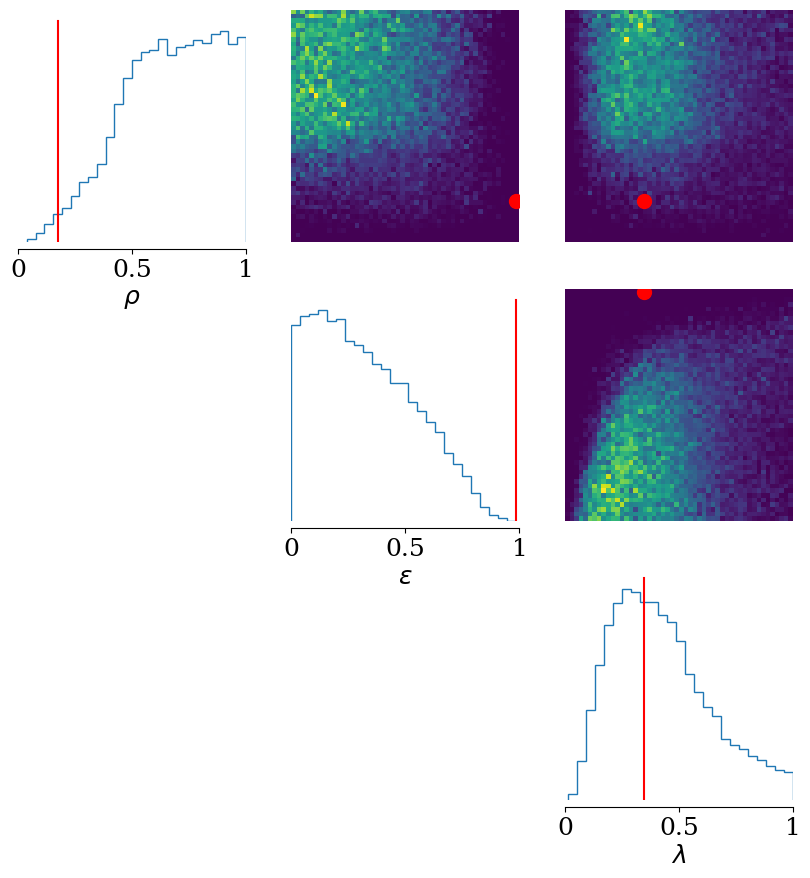

In [4]:
# Resnet 
fw_wp = np.loadtxt("../../exp_dir/fw_wp/1713037255.8700142/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(fw_wp, limits=[[0,1], [0, 1], [0, 1]], points=[np.array([2668/15000.,0.987/1.,1.726/5.])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


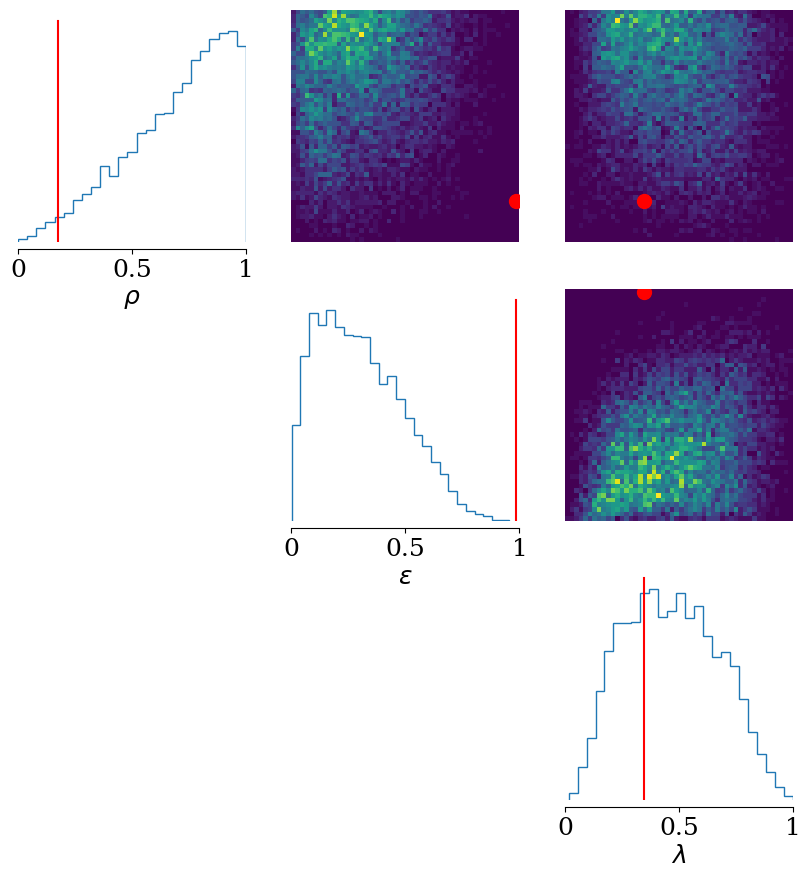

In [5]:
# maf_S
fw_wp = np.loadtxt("../../exp_dir/fw_wp/1713046331.384637/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(fw_wp, limits=[[0,1], [0, 1], [0, 1]], points=[np.array([2668/15000.,0.987/1.,1.726/5.])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


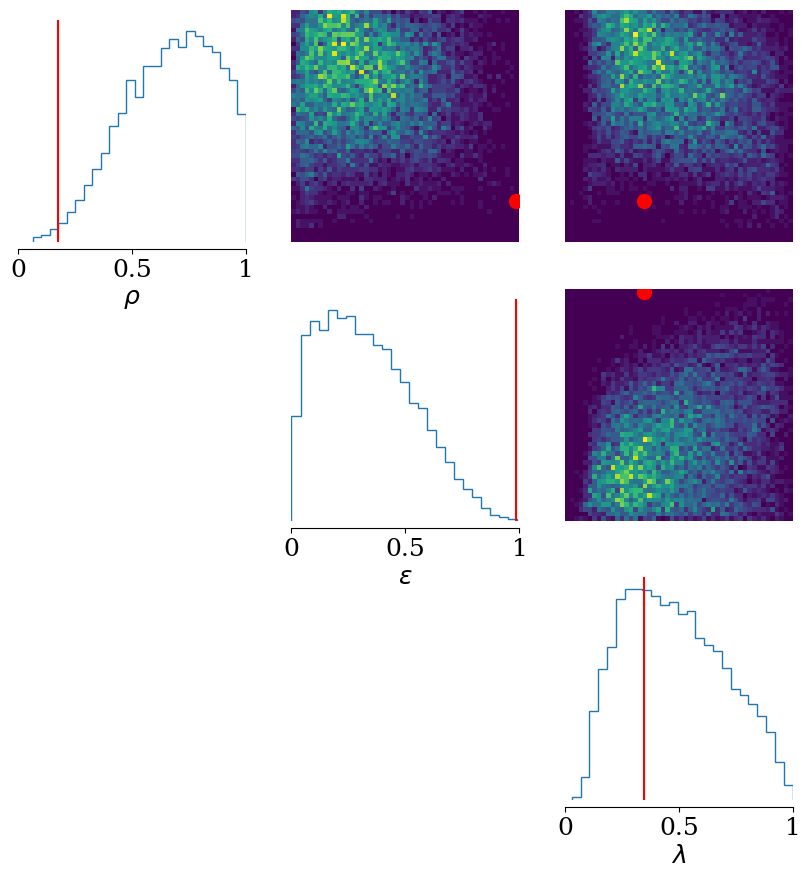

In [6]:
# maf_S - new architecture
fw_wp = np.loadtxt("../../exp_dir/fw_wp/1715240830.8935065/samples.txt")
plt.rcParams.update({'font.size':18}) # something about latex font
_ = analysis.pairplot(fw_wp, limits=[[0,1], [0, 1], [0, 1]], points=[np.array([2668/15000.,0.987/1.,1.726/5.])],
                      points_colors='r', labels=[r"$\rho$", r"$\epsilon$", r"$\lambda$", r"$\alpha$"],
                      hist_diag={"alpha": 1.0, "bins": 25, "density": False, "histtype": "step"})


# Posterior Predictive Checks 

In [6]:
from sbi4abm.utils import io

fw_wpf = io.load_task('fw_wp')

In [7]:
idxs = np.random.randint(fw_wp.shape[0], size=1000)

### Posterior Predictives

In [8]:
pps = []
for idx in idxs:
    data = fw_wpf[0](list(fw_wp[idx]))
    pps.append(data)

In [9]:
posterior_prices = []
posterior_wealth_fundamentalists = []
posterior_wealth_chartists = []
posterior_proportion_fundamentalists = []
posterior_demand_fundamentalists = []
posterior_demand_chartists = []

for pp in pps:
    if isinstance(pp, torch.Tensor):
        pp = pp.detach().cpu().numpy()

    posterior_prices.append(pp[0])
    posterior_wealth_fundamentalists.append(pp[1])
    posterior_wealth_chartists.append(pp[2])
    posterior_proportion_fundamentalists.append(pp[3])
    posterior_demand_fundamentalists.append(pp[4])
    posterior_demand_chartists.append(pp[5])
    

### Prior Predictives

In [10]:
pps_ = []
for idx in idxs:
    data = fw_wpf[0](list(fw_wpf[1].sample().tolist()))
    pps_.append(data)

In [13]:
prior_prices = []
prior_wealth_fundamentalists = []
prior_wealth_chartists = []
prior_proportion_fundamentalists = []
prior_demand_fundamentalists = []
prior_demand_chartists = []

for pp in pps_:
    if isinstance(pp, torch.Tensor):
        pp = pp.detach().cpu().numpy()

    prior_prices.append(pp[0])
    prior_wealth_fundamentalists.append(pp[1])
    prior_wealth_chartists.append(pp[2])
    prior_proportion_fundamentalists.append(pp[3])
    prior_demand_fundamentalists.append(pp[4])
    prior_demand_chartists.append(pp[5])
    

### Observation

In [15]:
final = fw_wpf[2][-1]
print(final)

observation_prices = 0.11313708
observation_wealth_fundamentalists = 0.08 
observation_wealth_chartists = -0.08 
observation_proportion_fundamentalists = final[3]
observation_demand_fundamentalists = final[4]
observation_demand_chartists = final[5]

0.0032916313876194536


IndexError: invalid index to scalar variable.

# Sensitivity Analysis

In [10]:
file_name = "1713046331.384637"
with open(f"../../exp_dir/fw_wp/{file_name}/posteriors.pkl", 'rb') as file:
    posterior = pickle.load(file)
    posterior = posterior[0]

Drawing 200 posterior samples: 9156it [00:02, 3060.17it/s]                       


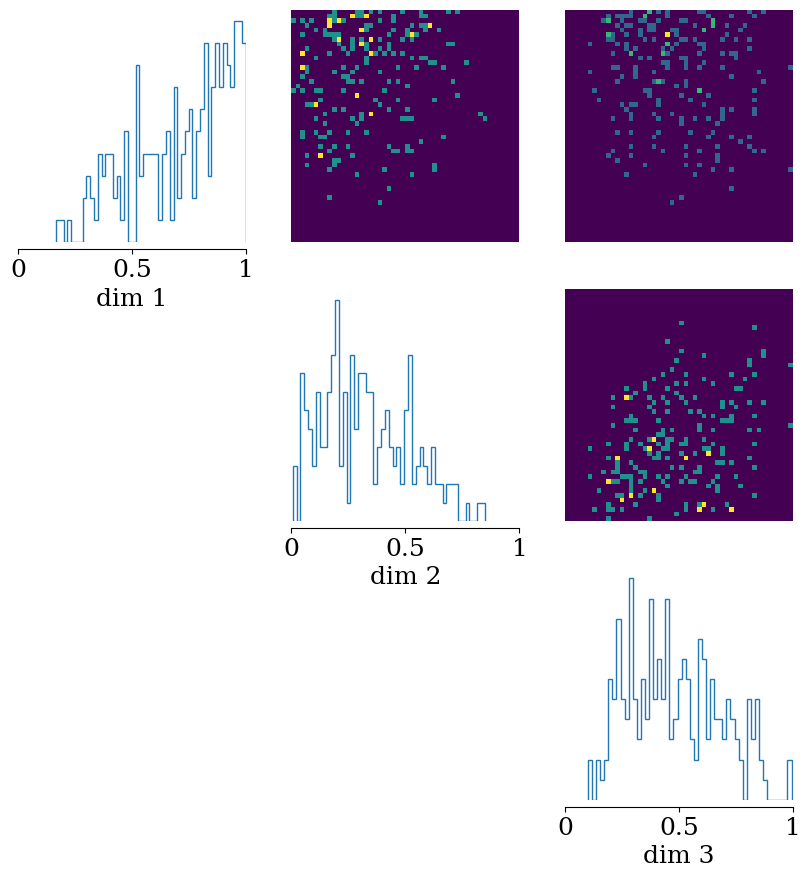

In [11]:
from sbi4abm.sbi.analysis import ActiveSubspace, pairplot

posterior_samples = posterior.sample((200,))
_ = pairplot(posterior_samples, limits=[[0,1], [0, 1], [0, 1]], figsize=(10, 10))

In [12]:
sensitivity = ActiveSubspace(posterior)
e_vals, e_vecs = sensitivity.find_directions(posterior_log_prob_as_property=True)

print("Eigenvalues: \n", e_vals, "\n")
print("Eigenvectors: \n", e_vecs)

Drawing 1000 posterior samples: 9861it [00:05, 1948.83it/s]                        


Eigenvalues: 
 tensor([1.1514e-06, 3.2721e-06, 5.4381e-06]) 

Eigenvectors: 
 tensor([[ 0.9617,  0.2226,  0.1602],
        [ 0.0153,  0.5395, -0.8419],
        [-0.2738,  0.8121,  0.5154]])
